# Autoencoder vs PCA

We compare an autoencoder to PCA in the case of data with a non-linear structure. Specifically we generate some toy data from a noisy circle.

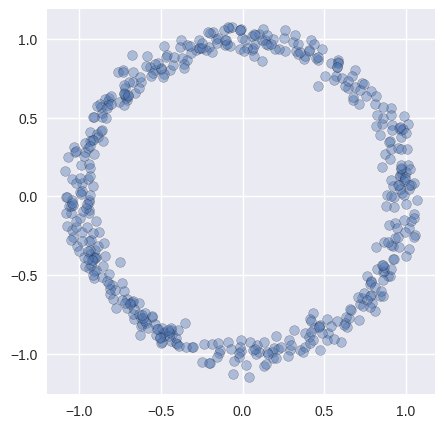

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

def generate_circle_data(size):
    angles=np.random.random(size)*math.pi*2
    noise=np.random.normal(size=size)*0.05
    return (np.array([np.cos(angles),np.sin(angles)])*[noise+1,noise+1]).T

circle=generate_circle_data(500)
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(circle[:,0],circle[:,1],alpha=0.4,edgecolor='k')
plt.show()

## PCA representation

The data is 2-dimensional but inherently it is 1-dimensional plus some noise. We apply a PCA to the data, where we represent each datapoint by a single real number, ie, we set <code>n_components=1</code>. When we do the inverse PCA transformation, ie, when we try to recover the original data from the 1-dimensional latent representation, we see that we largely fail. This is not surprising: PCA can only capture linear structure in the data.

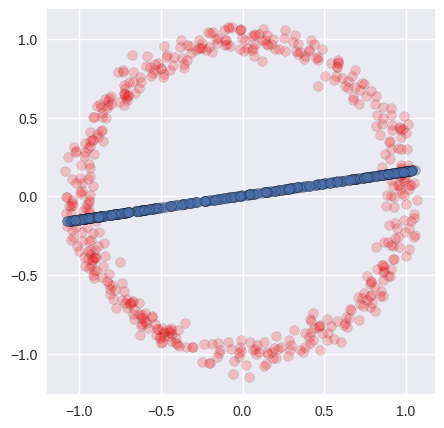

In [64]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)  ## we specify the number of principal components
Z=pca.fit_transform(circle)  
X_hat=pca.inverse_transform(Z)

fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(circle[:,0],circle[:,1],c='r',alpha=0.2,edgecolor='k')
ax.scatter(X_hat[:,0],X_hat[:,1],alpha=0.4,edgecolor='k')
plt.show()

## Autoencoder representation

We try again, this time with an autoencoder. As for PCA, we fix a latent dimension of $1$.

In [10]:
import tensorflow as tf
import keras

In [57]:
intermediate_dim = 10
interintermediate_dim=10
latent_dim = 1
input_dim=2

x = keras.layers.Input(shape=(input_dim,),name="input_layer")
encoder = keras.models.Sequential([
    keras.layers.Dense(intermediate_dim, input_dim=input_dim, activation='relu',name="encoder_hidden"),
    keras.layers.Dense(interintermediate_dim, activation='relu',name="encoder_hidden2"),
    keras.layers.Dense(latent_dim, activation='linear',name="coding_layer")
],name="encoder")

decoder = keras.models.Sequential([
    keras.layers.Dense(intermediate_dim, input_dim=latent_dim, activation='relu',name="decoder_hidden"),
    keras.layers.Dense(interintermediate_dim, activation='relu',name="decoder_hidden2"),
    keras.layers.Dense(input_dim, activation='linear',name="decoder_out")
],name="decoder")

z=encoder(x)
x_pred=decoder(z)
autoencoder = keras.models.Model(inputs=x, outputs=x_pred)
autoencoder.compile(optimizer='adam', loss="mse")

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 encoder (Sequential)        (None, 1)                 151       
                                                                 
 decoder (Sequential)        (None, 2)                 152       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [61]:
epochs=1000
batch_size=100

history=autoencoder.fit(circle,
        circle,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size)



Epoch 1/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 2/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 5/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 6/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 7/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 8/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 9/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 10/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 11/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 12/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 13/1000
5/5 [============================

In [62]:
X_hat=autoencoder.predict(circle)

16/16 [==============================] - 0s 2ms/step


The reconstruction from the latent representation is quite a bit better than for PCA:

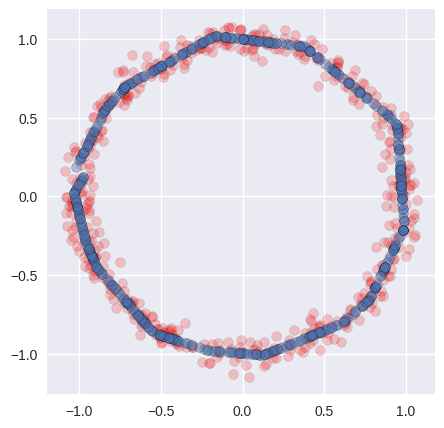

In [63]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(circle[:,0],circle[:,1],c='r',alpha=0.2,edgecolor='k')
ax.scatter(X_hat[:,0],X_hat[:,1],alpha=0.4,edgecolor='k')
plt.show()